# Tutorial 2: Feature Reduction and Selection

---

## Introduction

Welcome! This tutorial will show you how to reduce, and select the most prominent feature. This is very important pre-processing step because the infrared spectrum data are large and highly correlated.

In [1]:
import pandas as pd
import numpy as np

First, let us recall the data from the previous notebook

In [2]:
%store -r X
%store -r Y
%store -r df

In [3]:
X.head(3)

,833.647,833.915,834.183,834.451,834.720,834.989,835.258,835.527,835.796,836.066,...,2478.624,2480.996,2483.372,2485.753,2488.138,2490.529,2492.924,2495.323,2497.727,2500.136
0,-0.808493,-0.807557,-0.808127,-0.809277,-0.810315,-0.809986,-0.808822,-0.810160,-0.814925,-0.817989,...,-0.408186,-0.390167,-0.395094,-0.416035,-0.416191,-0.393794,-0.376064,-0.394183,-0.438806,-0.461273
1,-1.045204,-1.042834,-1.040064,-1.039891,-1.041951,-1.041888,-1.039677,-1.039588,-1.042774,-1.045571,...,-1.982225,-1.971150,-1.966837,-1.972678,-1.980933,-1.986981,-1.992071,-1.999241,-2.010441,-2.015706
2,-0.933558,-0.930759,-0.930131,-0.930111,-0.930078,-0.929796,-0.930579,-0.933991,-0.938503,-0.941131,...,-0.543787,-0.546740,-0.556853,-0.563482,-0.553554,-0.538869,-0.526329,-0.530286,-0.579681,-0.641481


---

<b><i> Data Reduction </i></b> 

one way to reduce the features is by calculating the average of every x coloumn in a df and create new df, but how can we do that.

##### **Example for data reduction**

First let us create a dummy dataframe

In [4]:
df_dumy = pd.DataFrame({'A': [0, 1, 2, 3, 4], 'B': [0, 10, 20, 30, 40], 'C': [0, 100, 200, 300, 400], 'D': [0, 1, 2, 3, 4],  'E': [0, 1, 2, 3, 4],  'F': [0, 1, 2, 3, 4]})
df_dumy

,A,B,C,D,E,F
0,0,0,0,0,0,0
1,1,10,100,1,1,1
2,2,20,200,2,2,2
3,3,30,300,3,3,3
4,4,40,400,4,4,4


now let us take the sum for every 3 coloumns

In [5]:
df_dumyRoll = df_dumy.rolling(3, axis = 1).sum()  # if axis = 1, means that the rolling window will go over the columns
print(df_dumyRoll)


    A   B      C      D      E     F
0 NaN NaN    0.0    0.0    0.0   0.0
1 NaN NaN  111.0  111.0  102.0   3.0
2 NaN NaN  222.0  222.0  204.0   6.0
3 NaN NaN  333.0  333.0  306.0   9.0
4 NaN NaN  444.0  444.0  408.0  12.0


Now we are only interested in non-overlapping window size

In [6]:
df_dumyRoll = df_dumyRoll.iloc[:, 2::3]
df_dumyRoll

,C,F
0,0.0,0.0
1,111.0,3.0
2,222.0,6.0
3,333.0,9.0
4,444.0,12.0


hope you by now you got the idea, now let us do the same on our main dataset

##### **Now applying feature reduction on GS data**

We have created a python function in `source.utils` called `creat_rollingData`. We will be using this function to create aggregated rolling window given a data frame, the function has the following @args:
 - df: a data frame
 - window_arr: an array of window sizes, we will be using this to create several aggregated datasets
 - axis: an int number, if equals to 1 then we run the aggregations across the columns (the default is 1)
 - method, the way to aggregate the data, the default is the mean (however it can change to other methods like sum, we encourage you to explore more)

In [7]:
import sys
sys.path.append("..")
from source.utils import creat_rollingData, skew_df, mean_df, kurt_df

first let us run the `creat_rollingData` function on the dummy data we called above

In [8]:
df_arrayRol_dumy  = creat_rollingData (df = df_dumy, window_arr = [2,3], method =  mean_df)
df_arrayRol_dumy

[      B      D    F
 0   0.0    0.0  0.0
 1   5.5   50.5  1.0
 2  11.0  101.0  2.0
 3  16.5  151.5  3.0
 4  22.0  202.0  4.0,
        C    F
 0    0.0  0.0
 1   37.0  1.0
 2   74.0  2.0
 3  111.0  3.0
 4  148.0  4.0]

We have checked that the method is working given the above results

In [9]:
X_arrayRol  = creat_rollingData (df = X, window_arr = [10, 30, 50, 100], method =  mean_df )

# let us see the shape of the created rolled dataframes
for x in X_arrayRol:
    print(x.shape)

(503, 207)
(503, 69)
(503, 41)
(503, 20)


Let us now visualise the data, we will make use of a customized function called `graph_df` in `source/graphs` directory

In [10]:
from source.graphs import graph_df

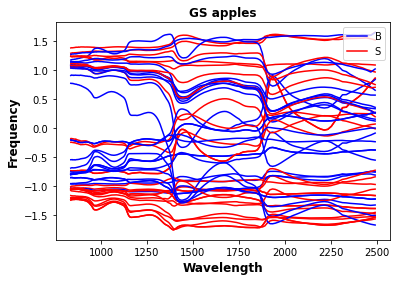

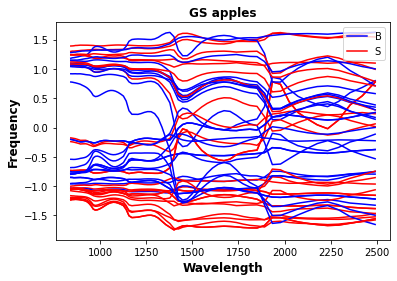

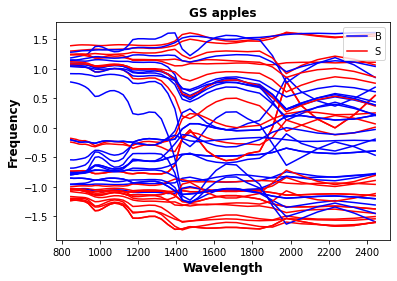

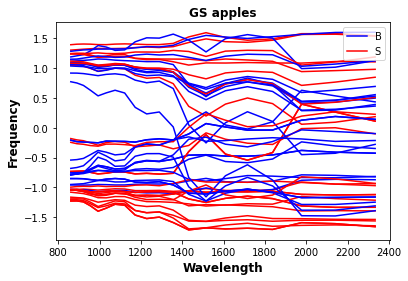

In [11]:
graph_df (X_arrayRol, Y, n = 50)


**Exercise 1:** Perfrom feature reduction for the other 2 datasets
<br>

In [12]:
#  ___ code here ____


**Exercise 2:** try to change the function 'mean_df' to other functions like `sum`, or `difference`.

hint: create you own function if needs be.
<br>

In [13]:
#  ___ code here ____


---

<b><i> Feature Selection </i></b> 

The idea is that we want to select the best N features from each data set we created above. I will set N = 10 (you are encouraged to change N)

For feature selection we will make use of `Sequential feature selection` (SQS) from sklearn, to know more about the method visit the following [link](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html)

We need to consider the following when using SFS:
   -  SFS is an optimization tool, hence we will need to split the data into training and testing and perform SFS/feature selection on the training set
   - SFS removes features based on the cross-validation score from a machine learning estimator, hence we will need to define a machine learning model to use for the feature selection. in this tutorial, we will be using Logistic regression.

In [14]:
from source.utils import split
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

In [21]:
selected_indexes = []

for x_roll in X_arrayRol:
    Xtrain, Xtest, Ytrain, Ytest  = split( x_roll, Y) # splitting the data
    print(Xtrain.shape)
    sfs = SequentialFeatureSelector(estimator=LogisticRegression(solver = 'newton-cg'), n_features_to_select=10, direction = 'forward') # def SFS
    sfs.fit(Xtrain.values, Ytrain)
    selected_indexes.append(sfs.support_) # storing the indexes of the best 10 features/columns


(352, 207)
(352, 69)
(352, 41)
(352, 20)


If you want to know how to choose the best N features automatically based on thier score, you can visit this [link](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html), or this [link](https://machinelearningmastery.com/rfe-feature-selection-in-python/)

**Exercise 3:** Perform feature selection on the other 2 data sets

<br>

**Exercise 4:** Visualise the feature importance using a scatter plot on the 3 datasets, as we would like to know where are the best 10 features.
<br>

DONE

---

<b><i> Saving data for later use </i></b>

We can save the data so that we can call it up again in the next notebooks

In [25]:
%store  X_arrayRol
%store  selected_indexes



Stored 'X_arrayRol' (list)
Stored 'selected_indexes' (list)
